<a href="https://colab.research.google.com/github/HannahanX/Predicting-Risk-of-Credit-Card-Default/blob/main/Predicting_Risk_of_Credit_Card_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Variables Description**

*There are 25 variables:*


ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others,5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

# **Preprocessing**

## Read data

In [ ]:
##Data Preparation

#Packages used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

# #Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

#Data load
df = pd.read_excel('/content/drive/Shared drives/OPIM 5512 python/Project Data/default of credit card clients.xls', header=1)

Mounted at /content/drive/


In [ ]:
#Data View
df.head()

ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0   1      20000    2  ...         0         0                           1
1   2     120000    2  ...         0      2000                           1
2   3      90000    2  ...      1000      5000                           0
3   4      50000    2  ...      1069      1000                           0
4   5      50000    1  ...       689       679                           0

[5 rows x 25 columns]

In [ ]:
# Rename columns and drop column
df = df.rename(columns={'default payment next month': 'default_pay', 
                        'PAY_0': 'PAY_1'})
df = df.drop('ID',axis=1)

## Deal with missing value

In [ ]:
# check missing values and data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LIMIT_BAL    30000 non-null  int64
 1   SEX          30000 non-null  int64
 2   EDUCATION    30000 non-null  int64
 3   MARRIAGE     30000 non-null  int64
 4   AGE          30000 non-null  int64
 5   PAY_1        30000 non-null  int64
 6   PAY_2        30000 non-null  int64
 7   PAY_3        30000 non-null  int64
 8   PAY_4        30000 non-null  int64
 9   PAY_5        30000 non-null  int64
 10  PAY_6        30000 non-null  int64
 11  BILL_AMT1    30000 non-null  int64
 12  BILL_AMT2    30000 non-null  int64
 13  BILL_AMT3    30000 non-null  int64
 14  BILL_AMT4    30000 non-null  int64
 15  BILL_AMT5    30000 non-null  int64
 16  BILL_AMT6    30000 non-null  int64
 17  PAY_AMT1     30000 non-null  int64
 18  PAY_AMT2     30000 non-null  int64
 19  PAY_AMT3     30000 non-null  int64
 20  PAY_AM

In [ ]:
#Percent of missing Data
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

LIMIT_BAL      0.0
SEX            0.0
EDUCATION      0.0
MARRIAGE       0.0
AGE            0.0
PAY_1          0.0
PAY_2          0.0
PAY_3          0.0
PAY_4          0.0
PAY_5          0.0
PAY_6          0.0
BILL_AMT1      0.0
BILL_AMT2      0.0
BILL_AMT3      0.0
BILL_AMT4      0.0
BILL_AMT5      0.0
BILL_AMT6      0.0
PAY_AMT1       0.0
PAY_AMT2       0.0
PAY_AMT3       0.0
PAY_AMT4       0.0
PAY_AMT5       0.0
PAY_AMT6       0.0
default_pay    0.0
dtype: float64

In [ ]:
# Check unique values of categorical vars
print(df.SEX.value_counts())
print(df.EDUCATION.value_counts())
print(df.MARRIAGE.value_counts())
print(df.default_pay.value_counts())

2    18112
1    11888
Name: SEX, dtype: int64
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
0    23364
1     6636
Name: default_pay, dtype: int64


In [ ]:
# Replace the the value of 5 and 6 in education to 0 (Unknown education)
df['EDUCATION'].replace(to_replace=[4,5,6], value= 0,inplace=True)
df['MARRIAGE'].replace(to_replace=[3], value= 0,inplace=True)

## Reorganize categorical variables

In [ ]:
#changes:
# replace the value of education, sex and marriage for clarification(data description and dummies creation)
df['EDUCATION'].replace(to_replace=[1], value='graduate',inplace=True)
df['EDUCATION'].replace(to_replace=[2], value='univeristy',inplace=True)
df['EDUCATION'].replace(to_replace=[3], value='high_school',inplace=True)
df['EDUCATION'].replace(to_replace=[0], value='other',inplace=True)
df['SEX'].replace(to_replace=[2], value='female',inplace=True)
df['SEX'].replace(to_replace=[1], value='male',inplace=True)
df['MARRIAGE'].replace(to_replace=[1], value='married',inplace=True)
df['MARRIAGE'].replace(to_replace=[2], value='single',inplace=True)
df['MARRIAGE'].replace(to_replace=[0], value='other',inplace=True)

In [ ]:
# check categorical vars again
print(df.SEX.value_counts())
print(df.EDUCATION.value_counts())
print(df.MARRIAGE.value_counts())

female    18112
male      11888
Name: SEX, dtype: int64
univeristy     14030
graduate       10585
high_school     4917
other            468
Name: EDUCATION, dtype: int64
single     15964
married    13659
other        377
Name: MARRIAGE, dtype: int64


In [ ]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LIMIT_BAL    30000 non-null  int64 
 1   SEX          30000 non-null  object
 2   EDUCATION    30000 non-null  object
 3   MARRIAGE     30000 non-null  object
 4   AGE          30000 non-null  int64 
 5   PAY_1        30000 non-null  int64 
 6   PAY_2        30000 non-null  int64 
 7   PAY_3        30000 non-null  int64 
 8   PAY_4        30000 non-null  int64 
 9   PAY_5        30000 non-null  int64 
 10  PAY_6        30000 non-null  int64 
 11  BILL_AMT1    30000 non-null  int64 
 12  BILL_AMT2    30000 non-null  int64 
 13  BILL_AMT3    30000 non-null  int64 
 14  BILL_AMT4    30000 non-null  int64 
 15  BILL_AMT5    30000 non-null  int64 
 16  BILL_AMT6    30000 non-null  int64 
 17  PAY_AMT1     30000 non-null  int64 
 18  PAY_AMT2     30000 non-null  int64 
 19  PAY_AMT3     30000 non-nu

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_pay'],
      dtype='object')

## Use this for data description ##

In [ ]:
# Use this for data description
data_description = pd.DataFrame(df)

In [ ]:
data_description.to_csv(r'C:\Users\disha\OneDrive\Desktop\College\Data_description_2.csv',index = False)

# **Data Description**

## Confusion Matrix

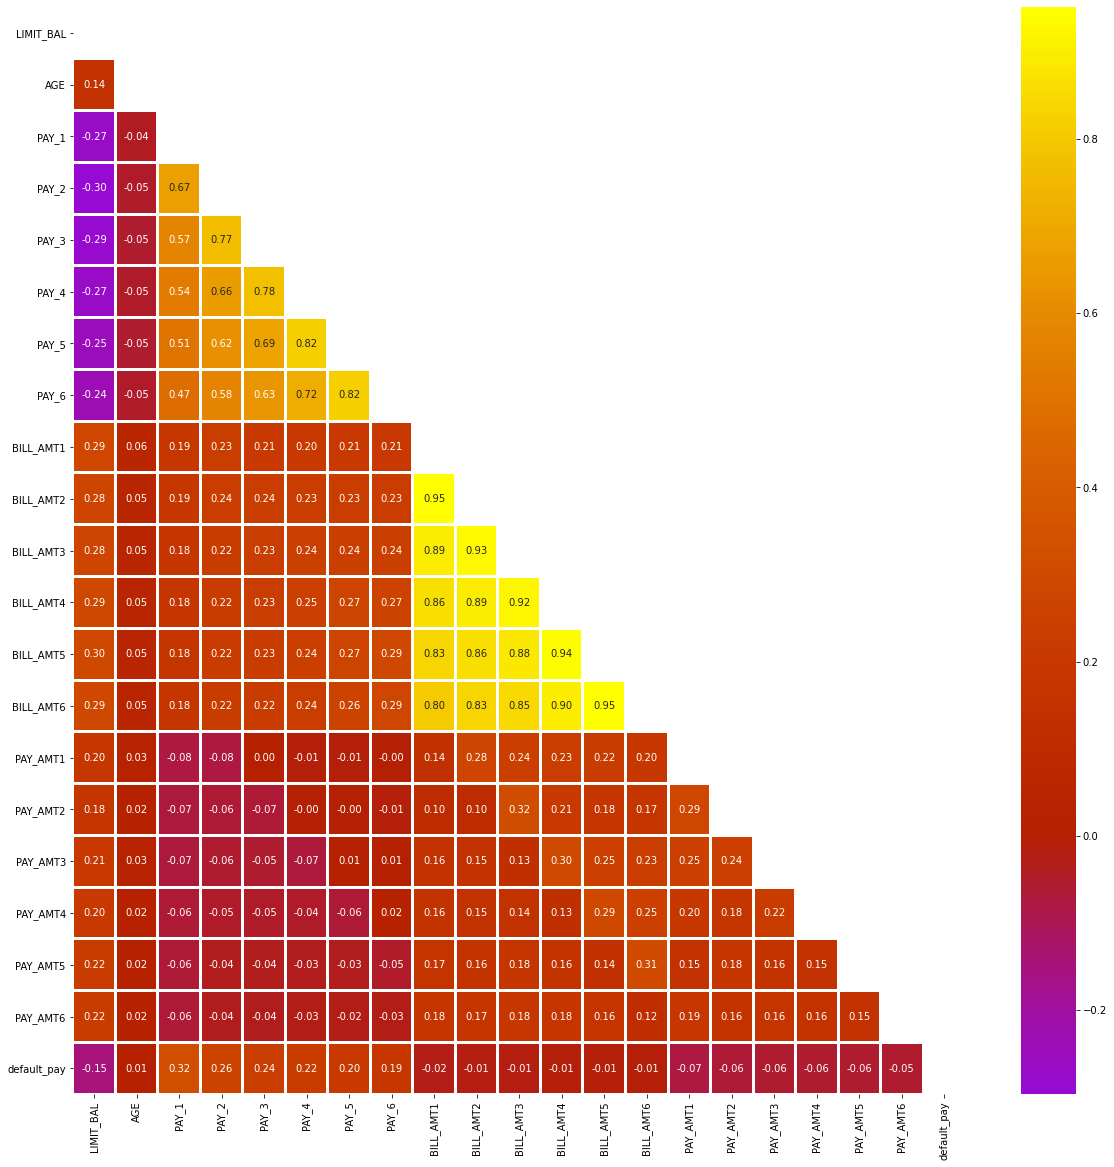

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
corr = df.corr()
# we can create a mask to not show duplicate values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, linewidths=2,fmt=".2f",center=0, mask=mask, cmap='gnuplot')
plt.show()

## Statsmodel-OLS

In [ ]:
# build statsmodel
from statsmodels.formula.api import ols

fit = ols('default_pay ~ LIMIT_BAL +C(SEX) + C(EDUCATION)+ C(MARRIAGE)+ AGE + PAY_1 + PAY_2 + PAY_3+PAY_4+PAY_5+PAY_6+BILL_AMT1+BILL_AMT2+BILL_AMT3+BILL_AMT4+BILL_AMT5+BILL_AMT6+PAY_AMT1+PAY_AMT2+PAY_AMT3+PAY_AMT4+PAY_AMT5+PAY_AMT6', data=df).fit() 
fit.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            default_pay   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     164.3
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:43:22   Log-Likelihood:                -14189.
No. Observations:               30000   AIC:                         2.843e+04
Df Residuals:                   29973   BIC:                         2.866e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.2550      0.012     20.503      0.000       0.231       0.279
C(SEX)[T.male]                  0.0150      0.005      3.241      0.001       0.006       0.024
C(EDUCATION)[T.high_school]    -0.0173      0.007     -2.403      0.016      -0.031      -0.003
C(EDUCATION)[T.other]          -0.1164      0.018     -6.309      0.000      -0.153      -0.080
C(EDUCATION)[T.univeristy]     -0.0137      0.005     -2.603      0.009      -0.024      -0.003
C(MARRIAGE)[T.other]           -0.0313      0.020     -1.536      0.125      -0.071       0.009
C(MARRIAGE)[T.single]          -0.0289      0.005     -5.572      0.000      -0.039      -0.019
LIMIT_BAL                   -8.421e-08   2.17e-08     -3.876      0.000   -1.27e-07   -4.16e-08
AGE                             0.0011      0.000      3.974      0.000       0.001       0.002
PAY_1                           0.0956      0.003     34.567      0.000       0.090       0.101
PAY_2                           0.0192      0.003      5.758      0.000       0.013       0.026
PAY_3                           0.0115      0.004      3.215      0.001       0.004       0.019
PAY_4                           0.0033      0.004      0.820      0.412      -0.005       0.011
PAY_5                           0.0058      0.004      1.338      0.181      -0.003       0.014
PAY_6                           0.0007      0.004      0.193      0.847      -0.006       0.008
BILL_AMT1                   -6.215e-07   1.14e-07     -5.447      0.000   -8.45e-07   -3.98e-07
BILL_AMT2                    1.616e-07    1.6e-07      1.008      0.313   -1.53e-07    4.76e-07
BILL_AMT3                    3.577e-08   1.51e-07      0.237      0.813    -2.6e-07    3.32e-07
BILL_AMT4                   -6.719e-08   1.57e-07     -0.427      0.669   -3.75e-07    2.41e-07
BILL_AMT5                   -1.383e-08   1.84e-07     -0.075      0.940   -3.75e-07    3.48e-07
BILL_AMT6                    1.001e-07   1.46e-07      0.686      0.493   -1.86e-07    3.86e-07
PAY_AMT1                    -7.508e-07   1.77e-07     -4.242      0.000    -1.1e-06   -4.04e-07
PAY_AMT2                    -2.139e-07   1.46e-07     -1.469      0.142   -4.99e-07    7.15e-08
PAY_AMT3                    -1.587e-08   1.69e-07     -0.094      0.925   -3.47e-07    3.15e-07
PAY_AMT4                    -2.575e-07   1.84e-07     -1.401      0.161   -6.18e-07    1.03e-07
PAY_AMT5                    -3.305e-07   1.91e-07     -1.732      0.083   -7.04e-07    4.34e-08
PAY_AMT6                    -9.735e-08   1.36e-07     -0.713      0.476   -3.65e-07     1.7e-07
==============================================================================
Omnibus:                     4666.544   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarqu

In [ ]:
# fit2 = ols('default_pay ~ LIMIT_BAL +C(SEX) + C(EDUCATION)+ C(MARRIAGE)+ AGE + PAY_1 + PAY_2 + PAY_3+BILL_AMT1+BILL_AMT2+PAY_AMT1+PAY_AMT5', data=df).fit() 
#fit2.summary()

## Stats Summary

In [ ]:
data_description.describe()

LIMIT_BAL           AGE  ...       PAY_AMT6   default_pay
count    30000.000000  30000.000000  ...   30000.000000  30000.000000
mean    167484.322667     35.485500  ...    5215.502567      0.221200
std     129747.661567      9.217904  ...   17777.465775      0.415062
min      10000.000000     21.000000  ...       0.000000      0.000000
25%      50000.000000     28.000000  ...     117.750000      0.000000
50%     140000.000000     34.000000  ...    1500.000000      0.000000
75%     240000.000000     41.000000  ...    4000.000000      0.000000
max    1000000.000000     79.000000  ...  528666.000000      1.000000

[8 rows x 21 columns]

In [ ]:
# Table showing the mean, std, median of age and given credit  with different Education level
a = df.loc[:,['AGE','LIMIT_BAL']].groupby(df['EDUCATION']).agg([np.mean, np.std])
a = a.reset_index()
# a = a.iloc[:,[0,1,3]]
# a.columns = ['EDUCATION','AGE',	'LIMIT_BAL']
a

EDUCATION        AGE                 LIMIT_BAL               
                     mean        std           mean            std
0     graduate  34.231838   8.270266  212956.069910  135474.936730
1  high_school  40.299980  10.440760  126550.270490  113979.322678
2        other  36.143162   9.313871  181316.239316  118385.690551
3   univeristy  34.722096   8.893848  147062.437634  120672.282033

In [ ]:
# Table showing the mean, std, median of age and given credit  with different Education level
a = df.loc[:,['AGE','LIMIT_BAL']].groupby(df['MARRIAGE']).agg([np.mean, np.std])
a = a.reset_index()
#a = a.iloc[:,[0,1,3]]
#a.columns = ['MARRIAGE','AGE',	'LIMIT_BAL']
a

MARRIAGE        AGE                LIMIT_BAL               
                 mean       std           mean            std
0  married  40.016692  8.720326  182200.893184  133382.262668
1    other  42.084881  9.484490  103076.923077   95572.613160
2   single  31.452706  7.592002  156413.660737  125673.426316

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


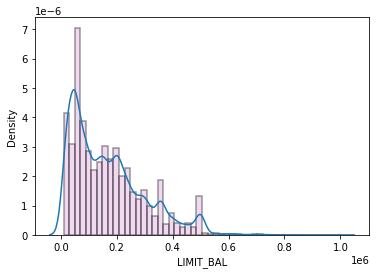

In [ ]:
sns.distplot(df['LIMIT_BAL'], hist_kws=dict(color='plum',edgecolor="k" ,linewidth=1.5)) 

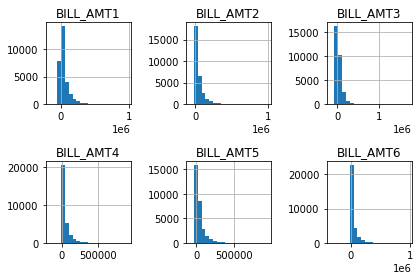

In [ ]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

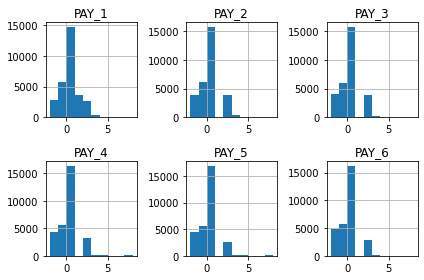

In [ ]:
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

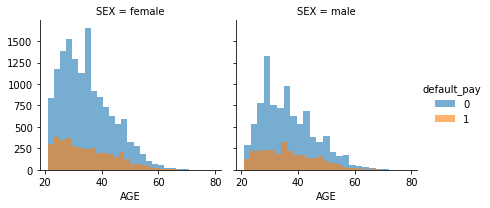

In [ ]:
g = sns.FacetGrid(df, col='SEX', hue='default_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

## Outlier Analysis using Box plot and scatterplot

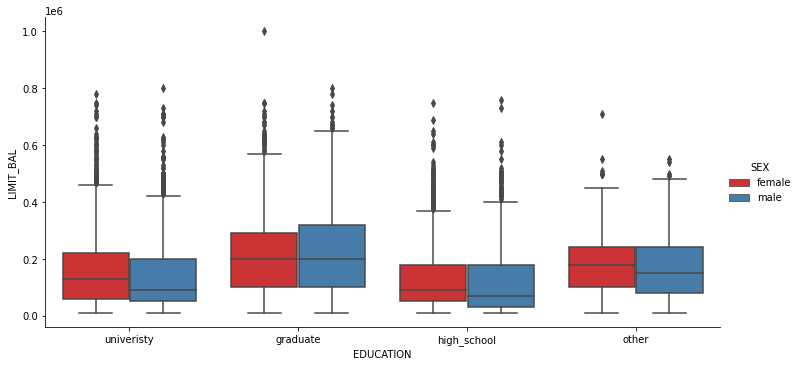

In [ ]:
# Take a look at the boxplot of given credit in different education and sex
sns.catplot(x='EDUCATION', y='LIMIT_BAL', hue='SEX', kind='box',data=df,aspect=2,palette="Set1")

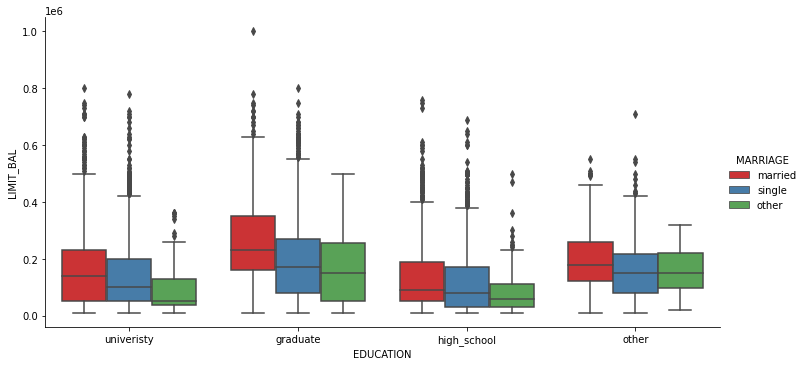

In [ ]:
# Take a look at the boxplot of given credit in different education and sex
sns.catplot(x='EDUCATION', y='LIMIT_BAL', hue='MARRIAGE', kind='box',data=df,aspect=2,palette="Set1")

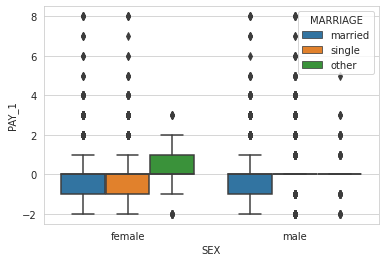

In [ ]:
sns.set_style("whitegrid")  
sns.boxplot(x = 'SEX', y = 'PAY_1',hue='MARRIAGE', data = df) 

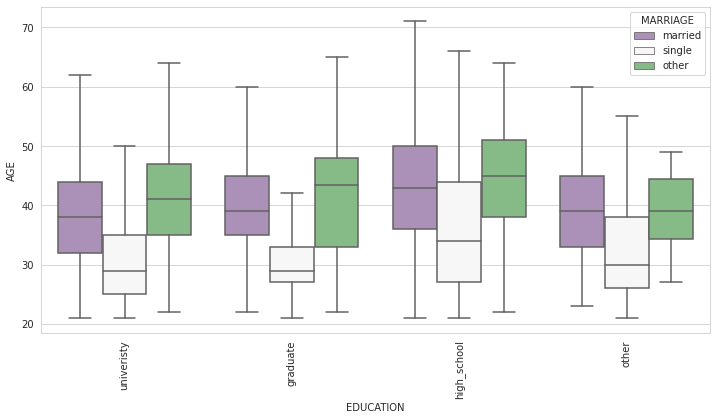

In [ ]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

# **Data Transformation**

In [ ]:
# Sklearn are useful for splitting and normalization
from sklearn.utils import resample # have a comparable number of categorical target in two classes
from sklearn.model_selection import train_test_split # split the train and test
from sklearn.preprocessing import  MinMaxScaler # scale the categorical to 0-1
from sklearn.preprocessing import OneHotEncoder # create dummies with categories-1

## Upsampling

In [ ]:
# Target column distribution
df.default_pay.value_counts()

0    23364
1     6636
Name: default_pay, dtype: int64

In [ ]:
# Since the dataset is imbalanced, we are upsampling the minority class 
# so that the models don't just predict majority class and still give a high accuracy
# This will ensure that the accuracy will not be misleading
df_majority = df[df.default_pay==0]
df_minority = df[df.default_pay==1]


df_sampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=20000,    # to be similar to majority class
                                 random_state=123)

df_f = pd.concat([df_majority, df_sampled])

In [ ]:
# Take a look at the new distribution
print(df_f.default_pay.value_counts())
# A better accuracy after resampling
print('A dummy model predicting majority class will give an accuracy of:', round(22996/(20000+22996),2))

0    23364
1    20000
Name: default_pay, dtype: int64
A dummy model predicting majority class will give an accuracy of: 0.53


## Spliting Data into train and test

In [ ]:
# The target variable is Y(default_pay)
y = df_f['default_pay']

In [ ]:
# Everything else is X, so just drop 'default_pay
X = df_f.drop('default_pay', axis=1)

In [ ]:
# Now, split the data in ONE LINE OF CODE and assigning four different variables at once
# with 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [ ]:
# Check the shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34691, 23) (8673, 23) (34691,) (8673,)


In [ ]:
# Check categorical variables and numeric variables seperately
print(df.select_dtypes(['object']).columns)
print(df.select_dtypes(['int64']).columns)

Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object')
Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_pay'],
      dtype='object')


In [ ]:
# Categorical columns to encode
columns_encode = ['SEX', 'EDUCATION', 'MARRIAGE'] # not include target
#numeric columns for scaling
columns_scale = ['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'] 


In [ ]:
# Fit and transform numeric vars in both train and test
scaler = MinMaxScaler() # normalization scale 0-1
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train[columns_scale])) # Use DataFrame to convert the array to DF
X_test_scale = pd.DataFrame(scaler.transform(X_test[columns_scale]))

In [ ]:
# give new df columns names
X_train_scale = X_train_scale.set_axis([columns_scale],axis=1)
X_test_scale = X_test_scale.set_axis([columns_scale],axis=1)

In [ ]:
# drop first to have category-1 dummies created
encoder = OneHotEncoder(sparse=False,drop='first') #drop first to have category-1 dummies created
X_train_encoder = pd.DataFrame(encoder.fit_transform(X_train[columns_encode])) 
X_test_encoder =  pd.DataFrame(encoder.transform(X_test[columns_encode]))
X_train_encoder

0    1    2    3    4    5
0      0.0  0.0  0.0  1.0  0.0  1.0
1      0.0  0.0  0.0  0.0  0.0  0.0
2      0.0  1.0  0.0  0.0  0.0  1.0
3      0.0  0.0  0.0  0.0  0.0  1.0
4      0.0  1.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...
34686  0.0  1.0  0.0  0.0  0.0  1.0
34687  0.0  0.0  0.0  0.0  0.0  1.0
34688  0.0  0.0  0.0  1.0  0.0  0.0
34689  1.0  0.0  0.0  0.0  0.0  1.0
34690  1.0  0.0  0.0  0.0  0.0  1.0

[34691 rows x 6 columns]

In [ ]:
# get column names that can copy and paste 
print(pd.get_dummies(X_train[columns_encode], drop_first=True).columns)
print(pd.get_dummies(X_test[columns_encode], drop_first=True).columns)

Index(['SEX_male', 'EDUCATION_high_school', 'EDUCATION_other',
       'EDUCATION_univeristy', 'MARRIAGE_other', 'MARRIAGE_single'],
      dtype='object')
Index(['SEX_male', 'EDUCATION_high_school', 'EDUCATION_other',
       'EDUCATION_univeristy', 'MARRIAGE_other', 'MARRIAGE_single'],
      dtype='object')


In [ ]:
X_train_encoder = X_train_encoder.set_axis(['SEX_male', 'EDUCATION_high_school', 'EDUCATION_other',
       'EDUCATION_univeristy', 'MARRIAGE_other', 'MARRIAGE_single'], axis=1)
X_test_encoder = X_test_encoder.set_axis(['SEX_male', 'EDUCATION_high_school', 'EDUCATION_other',
       'EDUCATION_univeristy', 'MARRIAGE_other', 'MARRIAGE_single'],axis=1)
X_train_encoder.head()

SEX_male  EDUCATION_high_school  ...  MARRIAGE_other  MARRIAGE_single
0       0.0                    0.0  ...             0.0              1.0
1       0.0                    0.0  ...             0.0              0.0
2       0.0                    1.0  ...             0.0              1.0
3       0.0                    0.0  ...             0.0              1.0
4       0.0                    1.0  ...             0.0              0.0

[5 rows x 6 columns]

In [ ]:
X_train =pd.concat([X_train_encoder, X_train_scale], axis=1)
X_test =pd.concat([X_test_encoder, X_test_scale], axis=1)
X_train.head()

SEX_male  EDUCATION_high_school  ...  (PAY_AMT5,)  (PAY_AMT6,)
0       0.0                    0.0  ...     0.000000     0.007653
1       0.0                    0.0  ...     0.000000     0.006342
2       0.0                    1.0  ...     0.010433     0.007755
3       0.0                    0.0  ...     0.002464     0.001076
4       0.0                    1.0  ...     0.011868     0.006407

[5 rows x 26 columns]

# **Modeling**

## Accuracies of Models

In [ ]:
# Build the different models once at a time and take a look at its accuracies 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import Perceptron

models = []
models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('BC', BaggingClassifier()))
models.append(('Perceptron',Perceptron()))

print("Mean Accuracy:")
for name, clf in models:
  clf.fit(X_train, y_train)
  result = clf.score(X_test, y_test)
  print("%s: %f" % (name, result))
# Random Forest gives the best accuracy, and then we break down the model to what we covered at class

Mean Accuracy:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR: 0.689957
GNB: 0.564049
DTC: 0.866136
RFC: 0.928629
GBC: 0.732042
KNN: 0.755217
SVC: 0.709328
BC: 0.915139
Perceptron: 0.569584


## Logistic Regression

In [ ]:
# import modules we'll need for classification modeling and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
LR = LogisticRegression(max_iter=600)
# fit the model - one line of code
LR = LR.fit(X_train, y_train)

In [ ]:
# save the predictions
train_preds = LR.predict(X_train) 
test_preds = LR.predict(X_test)

### Evaluate the model

In [ ]:
# train confusion matrix
confusion_matrix(y_train, train_preds)
# [tn, fp]
# [fn,tp]

array([[15297,  3397],
       [ 7277,  8720]])

In [ ]:
#train data classification report
trainReport = classification_report(y_train, train_preds)
print(trainReport)

              precision    recall  f1-score   support

           0       0.68      0.82      0.74     18694
           1       0.72      0.55      0.62     15997

    accuracy                           0.69     34691
   macro avg       0.70      0.68      0.68     34691
weighted avg       0.70      0.69      0.69     34691



In [ ]:
# test confusion matrix
confusion_matrix(y_test, test_preds)
# [tn, fp]
# [fn,tp]

array([[3816,  854],
       [1840, 2163]])

In [ ]:
#classification report for validation data
testReport = classification_report(y_test, test_preds)
print(testReport)
# 70% accuracy

              precision    recall  f1-score   support

           0       0.67      0.82      0.74      4670
           1       0.72      0.54      0.62      4003

    accuracy                           0.69      8673
   macro avg       0.70      0.68      0.68      8673
weighted avg       0.69      0.69      0.68      8673



## Perceptron 



In [ ]:
from sklearn.linear_model import Perceptron
ppn =  Perceptron(max_iter=40, eta0=0.1, random_state = 0)
ppn = ppn.fit(X_train, y_train)
# store the predictions
train_preds_ppn = ppn.predict(X_train)
test_preds_ppn = ppn.predict(X_test)

###Evaluate the model

In [ ]:
# train confusion matrix
confusion_matrix(y_train, train_preds_ppn)

array([[ 6990, 11704],
       [ 3255, 12742]])

In [ ]:
# test confusion matrix
confusion_matrix(y_test, test_preds_ppn)

array([[1748, 2922],
       [ 811, 3192]])

In [ ]:
# extract TP, TN, FP, FN
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_ppn).ravel()
(tn, fp, fn, tp)

(1748, 2922, 811, 3192)

In [ ]:
# train report
trainReport_ppn = classification_report(y_train, train_preds_ppn)
print(trainReport_ppn)
# test report
testReport_ppn = classification_report(y_test, test_preds_ppn)
print(testReport_ppn)

              precision    recall  f1-score   support

           0       0.68      0.37      0.48     18694
           1       0.52      0.80      0.63     15997

    accuracy                           0.57     34691
   macro avg       0.60      0.59      0.56     34691
weighted avg       0.61      0.57      0.55     34691

              precision    recall  f1-score   support

           0       0.68      0.37      0.48      4670
           1       0.52      0.80      0.63      4003

    accuracy                           0.57      8673
   macro avg       0.60      0.59      0.56      8673
weighted avg       0.61      0.57      0.55      8673



## SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=0.1, random_state = 0)
svc = svc.fit(X_train, y_train)
# store the predictions
train_preds_svc = svc.predict(X_train)
test_preds_svc = svc.predict(X_test)

### Evaluate the model

In [ ]:
# train confusion matrix
confusion_matrix(y_train, train_preds_svc)

array([[16672,  2022],
       [ 8512,  7485]])

In [ ]:
# test confusion matrix
confusion_matrix(y_test, test_preds_svc)

array([[4172,  498],
       [2151, 1852]])

In [ ]:
# extract TP, TN, FP, FN
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_svc).ravel()
(tn, fp, fn, tp)

(4172, 498, 2151, 1852)

In [ ]:
# train report
trainReport_svc = classification_report(y_train, train_preds_svc)
print(trainReport_svc)
# test report
testReport_svc = classification_report(y_test, test_preds_svc)
print(testReport_svc)

              precision    recall  f1-score   support

           0       0.66      0.89      0.76     18694
           1       0.79      0.47      0.59     15997

    accuracy                           0.70     34691
   macro avg       0.72      0.68      0.67     34691
weighted avg       0.72      0.70      0.68     34691

              precision    recall  f1-score   support

           0       0.66      0.89      0.76      4670
           1       0.79      0.46      0.58      4003

    accuracy                           0.69      8673
   macro avg       0.72      0.68      0.67      8673
weighted avg       0.72      0.69      0.68      8673



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC = DTC.fit(X_train, y_train)

# store the predictions
train_preds_DTC = DTC.predict(X_train)
test_preds_DTC = DTC.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.201595 to fit



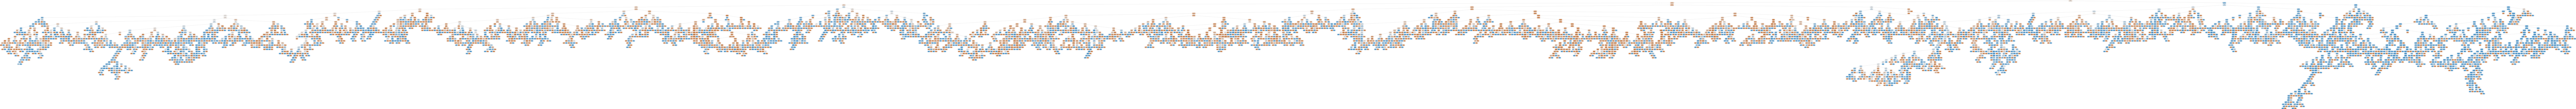

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(DTC,  # this is the name of your model!
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Evaluate the model

In [ ]:
# train confusion matrix
confusion_matrix(y_train, train_preds_DTC)
# test confusion matrix
confusion_matrix(y_test, test_preds_DTC)
# extract TP, TN, FP, FN
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_DTC).ravel()
(tn, fp, fn, tp)

(3778, 892, 230, 3773)

In [ ]:
# test confusion matrix
confusion_matrix(y_test, test_preds_DTC)

array([[3789,  881],
       [ 239, 3764]])

In [ ]:
trainReport_DTC = classification_report(y_train, train_preds_DTC)
print(trainReport_DTC)
testReport_DTC = classification_report(y_test, test_preds_DTC)
print(testReport_DTC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18694
           1       1.00      1.00      1.00     15997

    accuracy                           1.00     34691
   macro avg       1.00      1.00      1.00     34691
weighted avg       1.00      1.00      1.00     34691

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      4670
           1       0.81      0.94      0.87      4003

    accuracy                           0.87      8673
   macro avg       0.88      0.88      0.87      8673
weighted avg       0.88      0.87      0.87      8673



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC = RFC.fit(X_train, y_train)
# store the predictions
train_preds_RFC = RFC.predict(X_train)
test_preds_RFC = RFC.predict(X_test)

### Evaluate the model

In [ ]:
# train confusion matrix
confusion_matrix(y_train, train_preds_RFC)

array([[18680,    14],
       [    7, 15990]])

In [ ]:
# test confusion matrix
confusion_matrix(y_test, test_preds_RFC)

array([[4281,  389],
       [ 227, 3776]])

In [ ]:
# extract TP, TN, FP, FN
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_RFC).ravel()
(tn, fp, fn, tp)

(4281, 389, 227, 3776)

In [ ]:
# train report
trainReport_RFC = classification_report(y_train, train_preds_RFC)
print(trainReport_RFC)
testReport_RFC = classification_report(y_test, test_preds_RFC)
print(testReport_RFC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18694
           1       1.00      1.00      1.00     15997

    accuracy                           1.00     34691
   macro avg       1.00      1.00      1.00     34691
weighted avg       1.00      1.00      1.00     34691

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      4670
           1       0.91      0.94      0.92      4003

    accuracy                           0.93      8673
   macro avg       0.93      0.93      0.93      8673
weighted avg       0.93      0.93      0.93      8673



### Feature Map

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


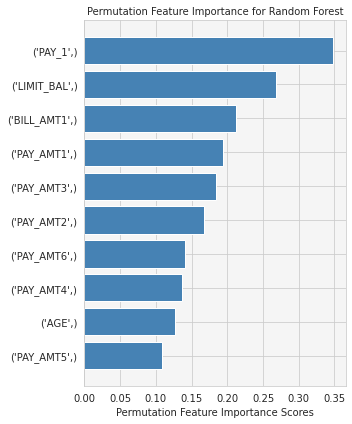

In [ ]:
#Feature Importance for Random Forest
X_t = pd.DataFrame(X_test)
nums=10
results = permutation_importance(RFC,X_train, y_train, scoring='neg_root_mean_squared_error',random_state=123)
plt.figure(figsize=(5,6))

#get importance
importance_nn = results.importances_mean
sorted_idx = np.argsort(importance_nn)[-nums:]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[-nums:], importance_nn[sorted_idx],align='center',color='steelblue')
ax = plt.axes()
# Setting the background color
ax.set_facecolor("whitesmoke")
plt.yticks(pos[-nums:], X_t.columns[sorted_idx],fontsize=10)
plt.xlabel('Permutation Feature Importance Scores', fontsize=10)
#plt.xticks(fontsize=100)
plt.title('Permutation Feature Importance for Random Forest', fontsize=10)
plt.tight_layout()
plt.show()

 Since Random Forest gives the best accuracy on test data, we use its model as our final model to predict default payment. When we conduct Feature Importance, the result shows that the important variables in this model are Pay_1, Limit_Bal, Bill_AMT1, PAY_AMT1, PAY_AMT3, PAY_AMT2, PAY_AMT6, PAY_AMT4, AGE, PAY_AMT5